In [14]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(xtrain, ytrain), (xtest, ytest) = keras.datasets.cifar10.load_data()
xtrain = xtrain/xtrain.max()
xtest = xtest/xtest.max()
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


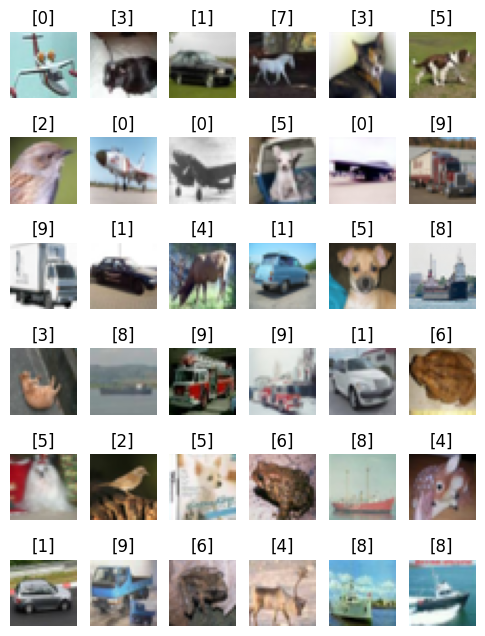

In [16]:
plt.figure(1,(6,8))
np.random.seed(5)
for i in range(1,37):
    temp = np.random.randint(0,50000)
    im = xtrain[temp,:,:]
    lab = ytrain[temp]
    plt.subplot(6,6,i)
    plt.imshow(im)
    plt.title(lab)
    plt.axis('off')
    plt.show

In [17]:

nn_model = keras.Sequential() # create an empty neural network feed forward

#framework
nn_model.add(keras.layers.Flatten(input_shape=(xtrain.shape[1],xtrain.shape[2],xtrain.shape[3]))) #input layer

nn_model.add(keras.layers.Dense(128,activation='relu')) #hidden layer
nn_model.add(keras.layers.Dense(256,activation='relu')) #hidden layer
nn_model.add(keras.layers.Dense(256,activation='relu')) #hidden layer

nn_model.add(keras.layers.Dense(len(np.unique(ytrain)))) #output layer

#add optimizer
nn_model.compile(optimizer="SGD", loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

print(nn_model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               393344    
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 494730 (1.89 MB)
Trainable params: 494730 (1.89 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [20]:
#train the model
history = nn_model.fit(xtrain, ytrain, epochs=100)

Epoch 1/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1689 - accuracy: 0.5857
Epoch 2/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1530 - accuracy: 0.5908
Epoch 3/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1381 - accuracy: 0.5968
Epoch 4/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1233 - accuracy: 0.6011
Epoch 5/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1067 - accuracy: 0.6091
Epoch 6/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0941 - accuracy: 0.6100
Epoch 7/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0803 - accuracy: 0.6178
Epoch 8/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0664 - accuracy: 0.6206
Epoch 9/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0537 - accuracy: 0.6253
Epoch 10/100
1563/1563 [==============================] - 6s 4ms/step - l

Text(0, 0.5, 'Accuracy')

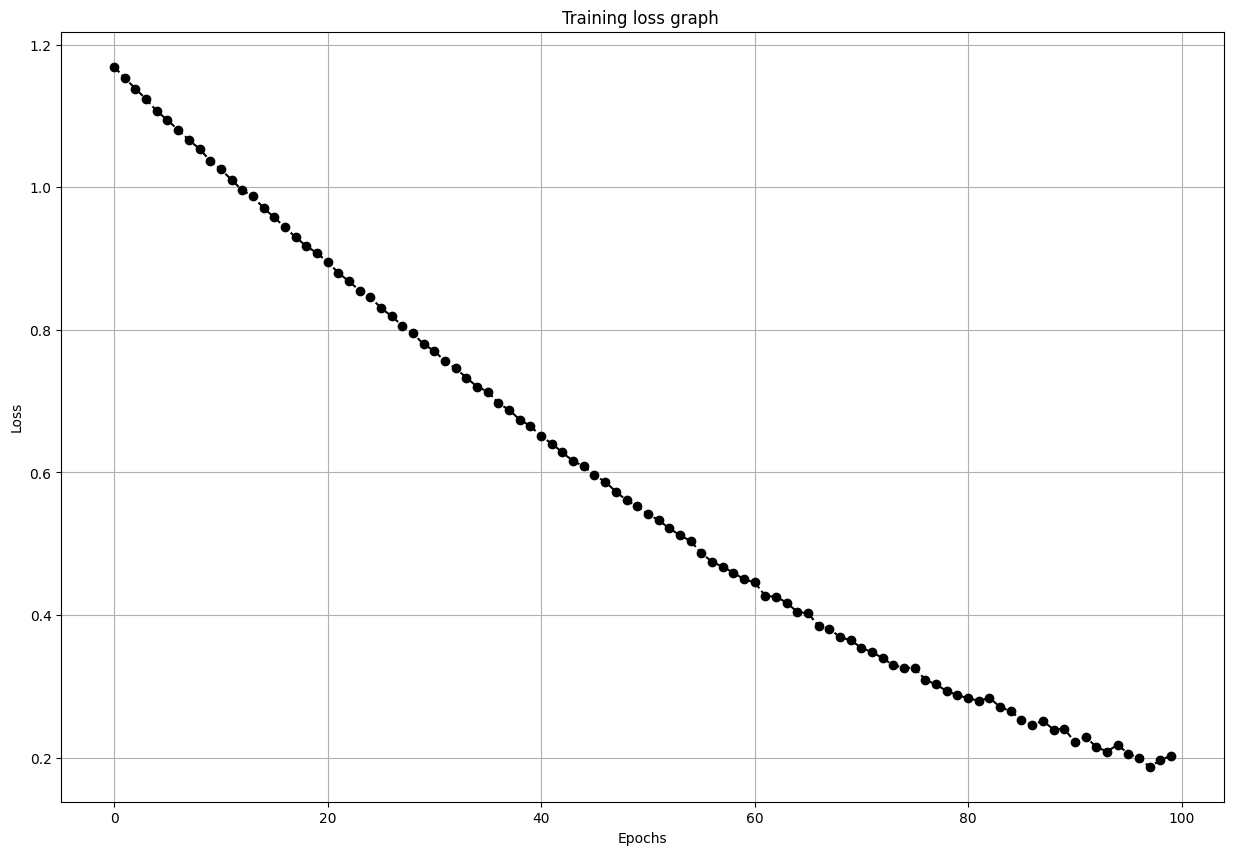

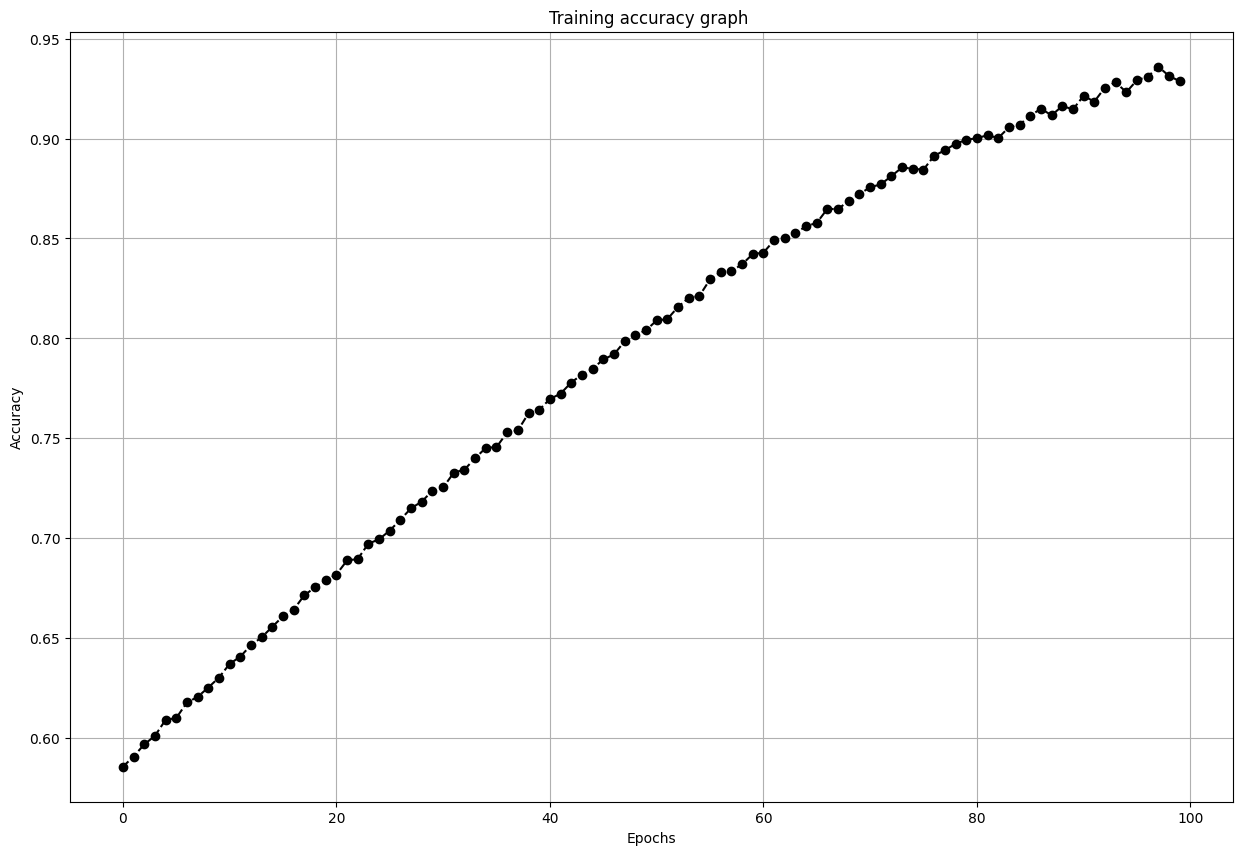

In [24]:
# visualize the training loss and acc
plt.figure(1,(15,10))

plt.plot(history.epoch,history.history['loss'],'--ko')
plt.grid('on')
plt.title('Training loss graph ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.figure(2,(15,10))
plt.plot(history.epoch,history.history['accuracy'],'--ko')
plt.grid('on')
plt.title('Training accuracy graph ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [22]:
#evaluate the test data

[loss, acc] = nn_model.evaluate(xtest, ytest)
print(f"Test loss: {loss}")
print(f"Test accuracy: {acc}")

313/313 [==============================] - 1s 3ms/step - loss: 3.0635 - accuracy: 0.4976
Test loss: 3.063544750213623
Test accuracy: 0.4975999891757965
